Step 1: Data Cleaning and Basic Visualization Load the Dataset: First, you need to load the dataset from the provided Kaggle link. You can use libraries like pandas to read the data.

Inspect the Data: Check for missing values, data types, and basic statistics.

Data Cleaning: Handle any missing values or incorrect data types. You may need to convert data types or fill in missing values.

Basic Visualization: Use libraries like matplotlib or seaborn to visualize the relationship between study hours and exam scores. A scatter plot can be useful here.

Step 2: Split the Dataset Feature Selection: Select the relevant features for your model. In this case, you will use study hours as the independent variable (feature) and exam scores as the dependent variable (target).

Train-Test Split: Use train_test_split from sklearn.model_selection to split the dataset into training and testing sets. A common split is 80% for training and 20% for testing.

Step 3: Train a Linear Regression Model Import the Model: Use LinearRegression from sklearn.linear_model.

Fit the Model: Train the model using the training data.

Make Predictions: Use the trained model to make predictions on the test set.

Step 4: Visualize Predictions and Evaluate Model Performance Visualize Predictions: Create a scatter plot of the actual vs. predicted exam scores to see how well the model performs.

Evaluate Model Performance: Use metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared to evaluate the model's performance.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# 1. Load the dataset
df = pd.read_csv("StudentPerformanceFactors.csv")

In [ ]:

# 2. Initial Inspection
print("Initial Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Data Types:\n", df.dtypes)

Initial Shape: (6607, 20)
Missing Values:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
Data Types:
 Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_L

In [ ]:
# 3. Data Cleaning
# Drop missing values
df = df.dropna()
print("Shape After Dropping NAs:", df.shape)

Shape After Dropping NAs: (6378, 20)


In [ ]:
# Encode categorical columns
for col in df.select_dtypes(include='object').columns:
    df = pd.get_dummies(df, columns=[col], drop_first=True)

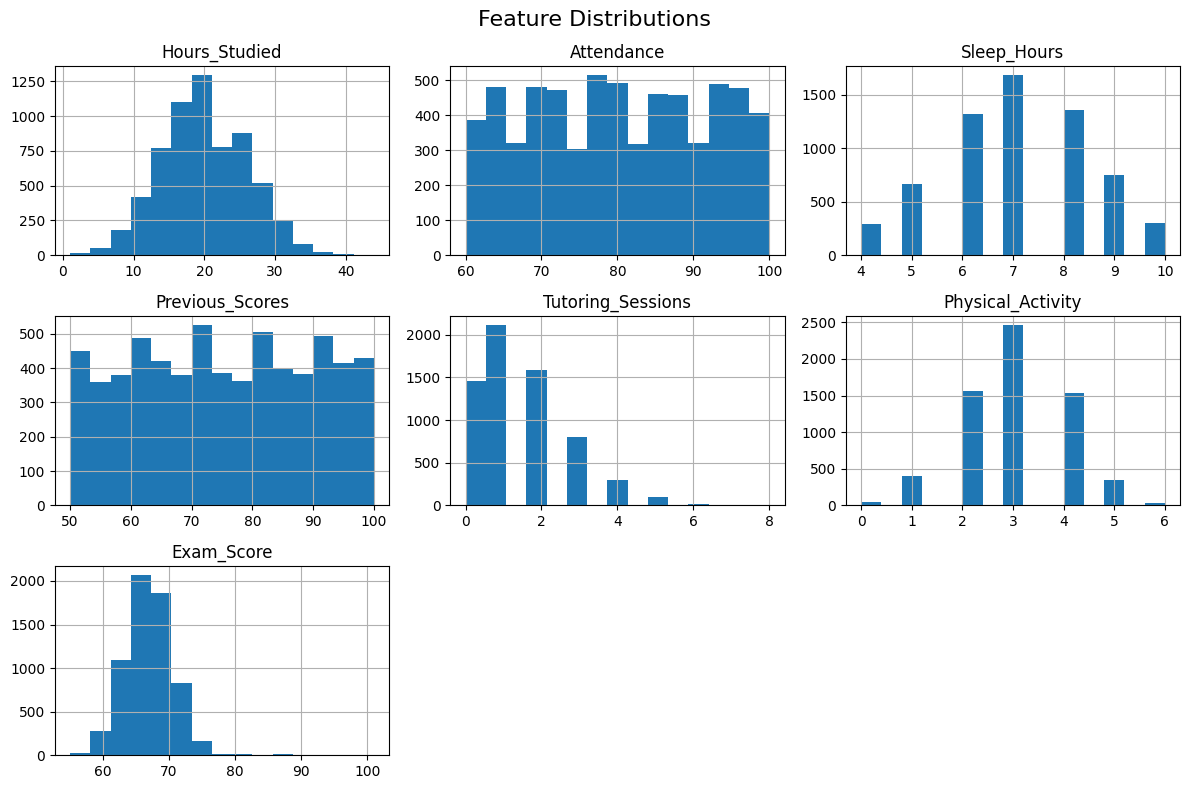

In [ ]:
# 4. Basic Visualization
# a. Histograms of numeric columns
df.hist(figsize=(12, 8), bins=15)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

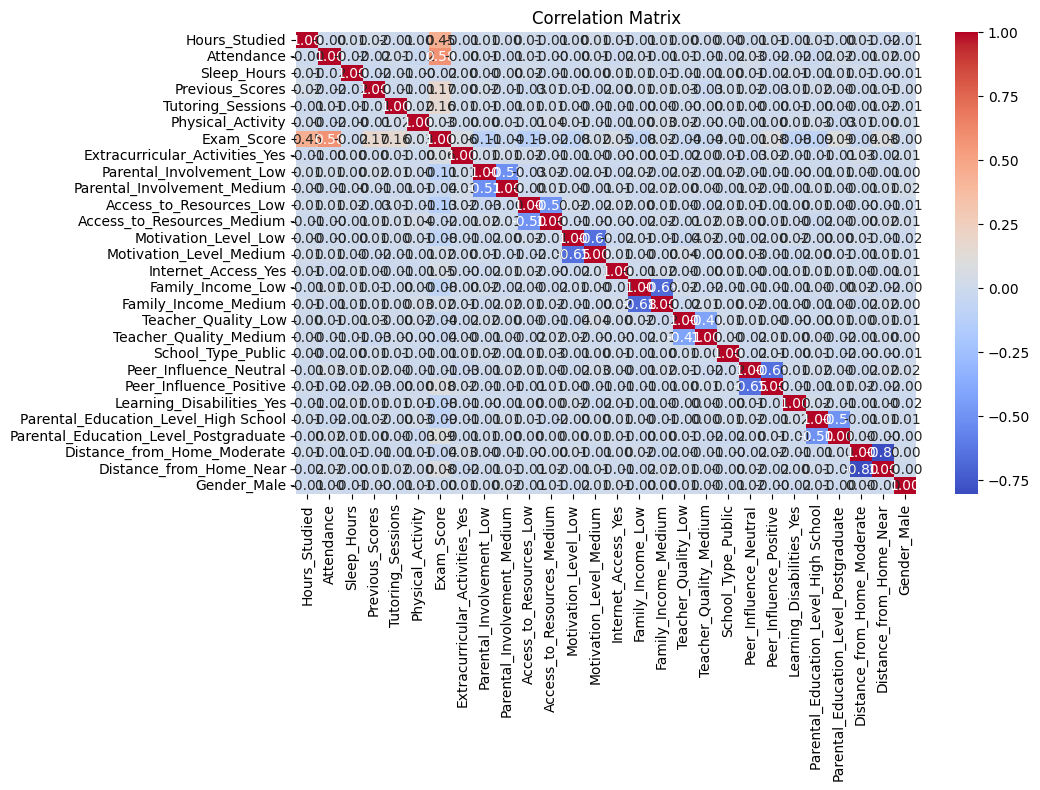

In [ ]:
# b. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

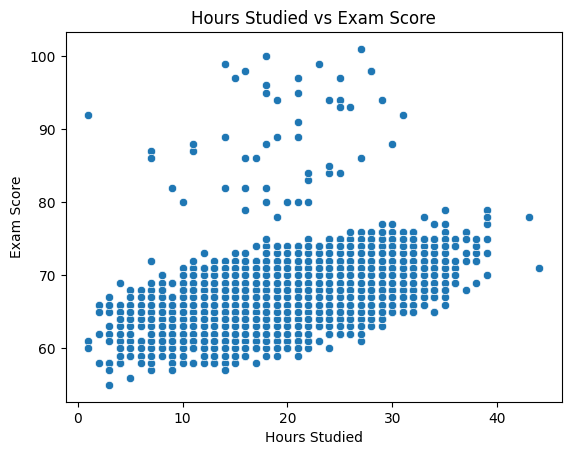

In [ ]:
# c. Scatter Plot: Hours_Studied vs Exam_Score
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title("Hours Studied vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()

In [ ]:
# 5. Feature Selection
features = [
    'Hours_Studied',
    'Previous_Scores',
    'Sleep_Hours',
]
features += [col for col in df.columns if 'Extracurricular_Activities_' in col]

X = df[features]
y = df['Exam_Score']

In [ ]:
# 6. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 7. Define Models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [ ]:
# 8. Train, Predict, Evaluate
results = []
mean_actual = y_test.mean()

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    accuracy = 100 - (mae / mean_actual * 100)

    results.append({
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R2 Score': r2,
        'Accuracy (%)': accuracy
    })

In [ ]:
# 9. Results Summary
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print("\nModel Performance Comparison:\n")
print(results_df[['Model', 'MAE', 'RMSE', 'R2 Score', 'Accuracy (%)']])


Model Performance Comparison:

               Model       MAE      RMSE  R2 Score  Accuracy (%)
0  Linear Regression  2.446745  3.422761  0.246088     96.362862
1   Ridge Regression  2.446750  3.422765  0.246085     96.362854
2   Lasso Regression  2.457184  3.432839  0.241641     96.347345
3      Random Forest  2.885999  4.056821 -0.059106     95.709901


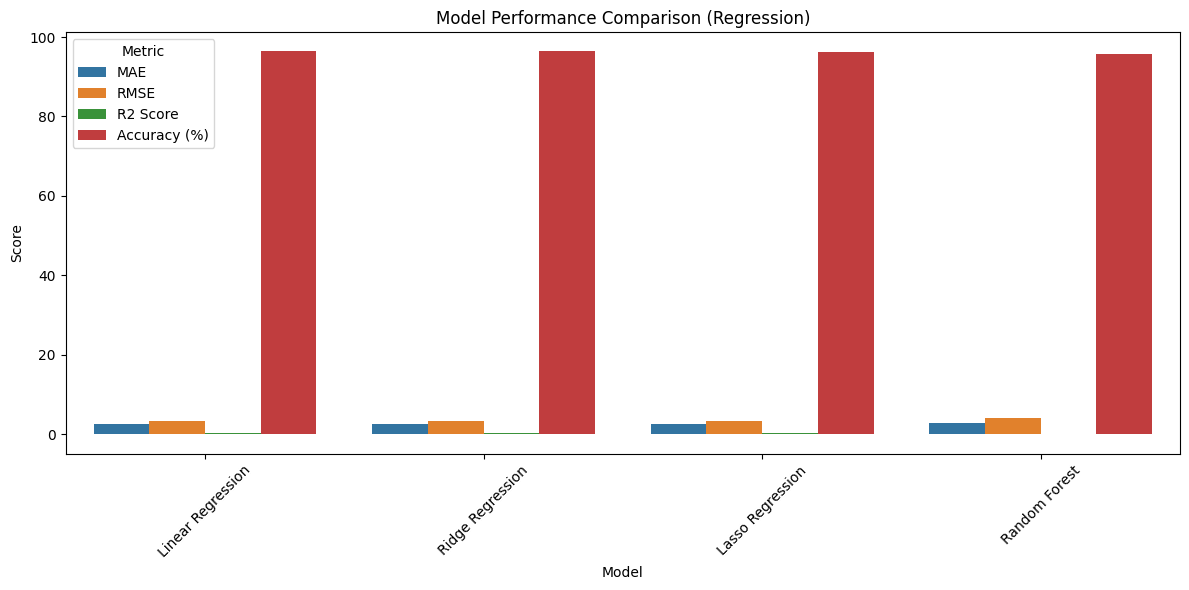

In [ ]:
# 10. Plot Comparison
plt.figure(figsize=(12, 6))
results_melted = results_df.melt(id_vars='Model',
                                 value_vars=['MAE', 'RMSE', 'R2 Score', 'Accuracy (%)'],
                                 var_name='Metric', value_name='Score')
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric')
plt.title("Model Performance Comparison (Regression)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()